# 1. Import Libraries & Load CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Show all columns
pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Quick Data Overview

In [2]:
df.shape
df.info()
df.describe(include='all').T
df['Churn'].value_counts()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. Clean Known Issues (TotalCharges etc.)

**In this dataset, TotalCharges is read as object due to some blanks.**

In [3]:
# Replace blanks in TotalCharges with NaN, then convert to float
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Check missing again
df.isna().sum()

# Drop rows with missing TotalCharges (few rows only)
df = df.dropna(subset=['TotalCharges'])

df.shape


(7032, 21)

# 4. Exploratory Data Analysis (EDA)

## 4.1 Churn Distribution

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


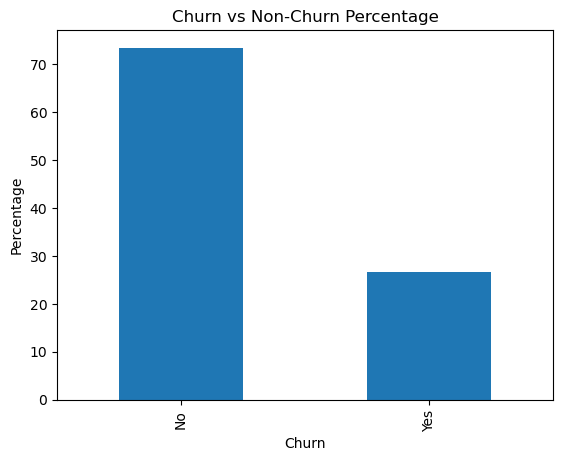

In [5]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)

churn_counts.plot(kind='bar')
plt.title('Churn vs Non-Churn Percentage')
plt.ylabel('Percentage')
plt.show()


## 4.2 Churn by Contract Type

In [6]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


## 4.3 Churn VS ... (basic look)

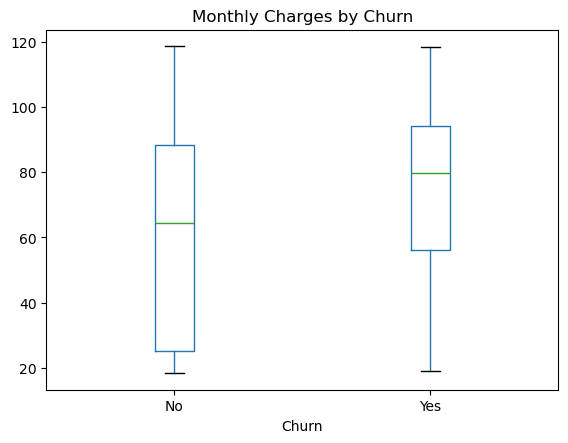

In [7]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

# Boxplot MonthlyCharges vs Churn
df.boxplot(column='MonthlyCharges', by='Churn', grid=False)
plt.title('Monthly Charges by Churn')
plt.suptitle("")
plt.show()


Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


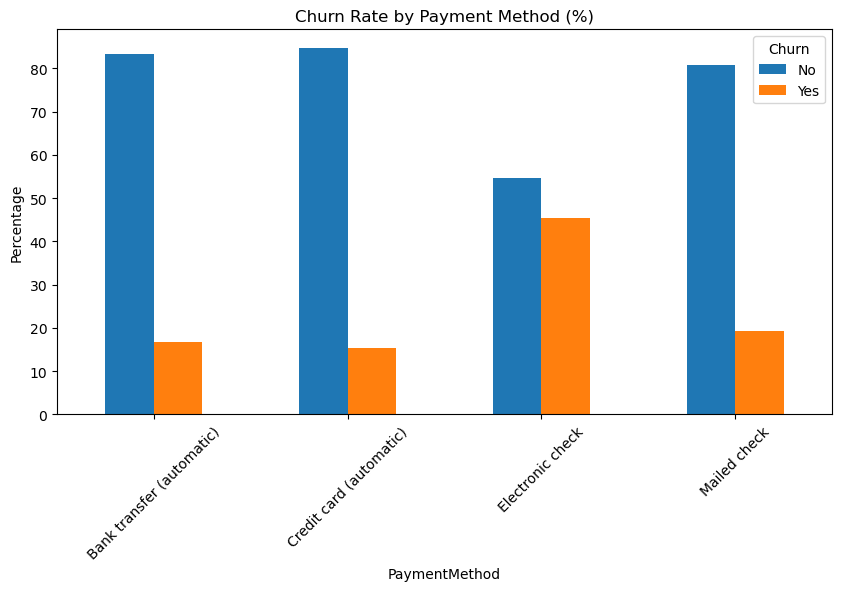

In [8]:
# Churn rate by Payment Method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(payment_churn)

# Plot
payment_churn.plot(kind='bar', figsize=(10,5))
plt.title('Churn Rate by Payment Method (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


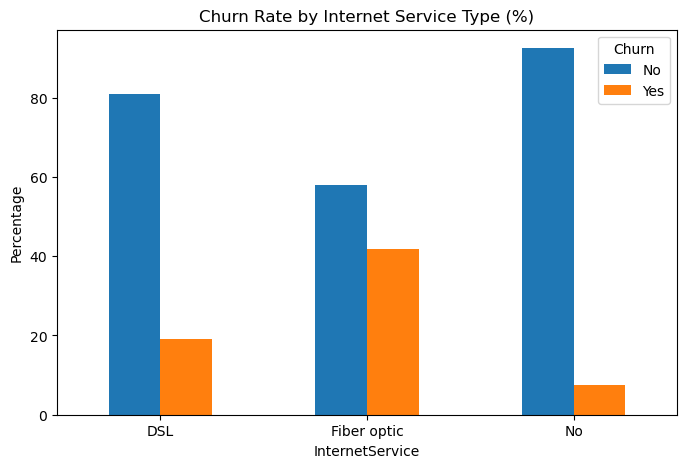

In [9]:
# Churn rate by Internet Service

internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(internet_churn)

internet_churn.plot(kind='bar', figsize=(8,5))
plt.title('Churn Rate by Internet Service Type (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


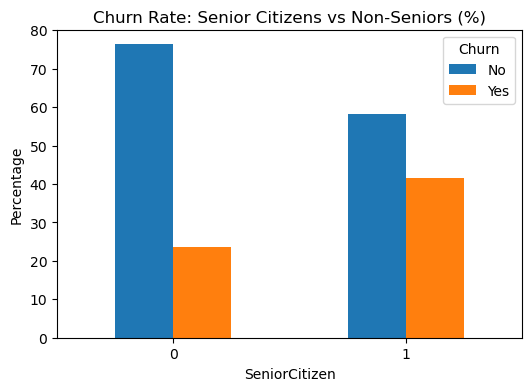

In [10]:
# Churn rate by Senior Citizens

senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
print(senior_churn)

senior_churn.plot(kind='bar', figsize=(6,4))
plt.title('Churn Rate: Senior Citizens vs Non-Seniors (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


# 5. Feature Engineering

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [13]:
# Split into X/y:
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]


In [15]:
# 6.Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [16]:
# Scale the Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
# Train Logistic Regression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# Evaluate Model
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8038379530916845

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[916 117]
 [159 215]]


In [19]:
# Feature Importance

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coef": model.coef_[0]
})

feature_importance["abs_coef"] = feature_importance["coef"].abs()
feature_importance.sort_values("abs_coef", ascending=False).head(10)


,feature,coef,abs_coef
1,tenure,-1.347613,1.347613
2,MonthlyCharges,-0.851551,0.851551
10,InternetService_Fiber optic,0.727745,0.727745
3,TotalCharges,0.639028,0.639028
25,Contract_Two year,-0.602591,0.602591
24,Contract_One year,-0.310898,0.310898
21,StreamingTV_Yes,0.249702,0.249702
23,StreamingMovies_Yes,0.236368,0.236368
9,MultipleLines_Yes,0.214359,0.214359
28,PaymentMethod_Electronic check,0.181473,0.181473


# Export Data for Power BI

In [20]:
df.to_csv("cleaned_churn_data.csv", index=False)
